# Test log-likelihood of scPI-based methods (Cortex)

In [1]:
import numpy as np
import torch
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
import time
from scPI import scPI_FA
from scPI import scPI_ZIFA
from scPI import scPI_ZINB
from utils import *
from sklearn.decomposition import FactorAnalysis

### example of evaluating test log-likelihood

See demo_scPI-FA_cortex.ipynb, demo_scPI-ZIFA_cortex.ipynb for example.

### Visualization of test log-likelihood

In [2]:
def barplot(mean, alg, title, minv=1000, maxv=1350, save=None):
    ind = np.arange(len(mean))/2  # the x locations for the groups
    width = 0.25       # the width of the bars
    fig = plt.figure(dpi=200)
    grid = plt.GridSpec(1, 15, wspace=0.2, hspace=0.2)
    ax = plt.subplot(grid[:, 2:])
    rects1 = ax.barh(ind[:4], mean[:4], width, color='tab:blue', alpha = 0.8, left=-1400)
    rects1 = ax.barh(ind[4:], mean[4:], width, color='tab:red', alpha = 0.8, left=-1400)
    #ax.axvline(x=np.min(np.array(mean)[np.array(mean) > 0]), ymin=0, ymax = 5, linewidth=1, color='b')
    #plt.xlim(minv, maxv)
    
    # add some text for labels, title and axes ticks
    ax.set_xlabel(title, fontsize=14)
    ax.set_yticks(ind)
    ax.set_yticklabels(alg)
    plt.tight_layout()

/home/jzhaoaz/.local/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  app.launch_new_instance()


(array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5]),
 <a list of 8 Text major ticklabel objects>)

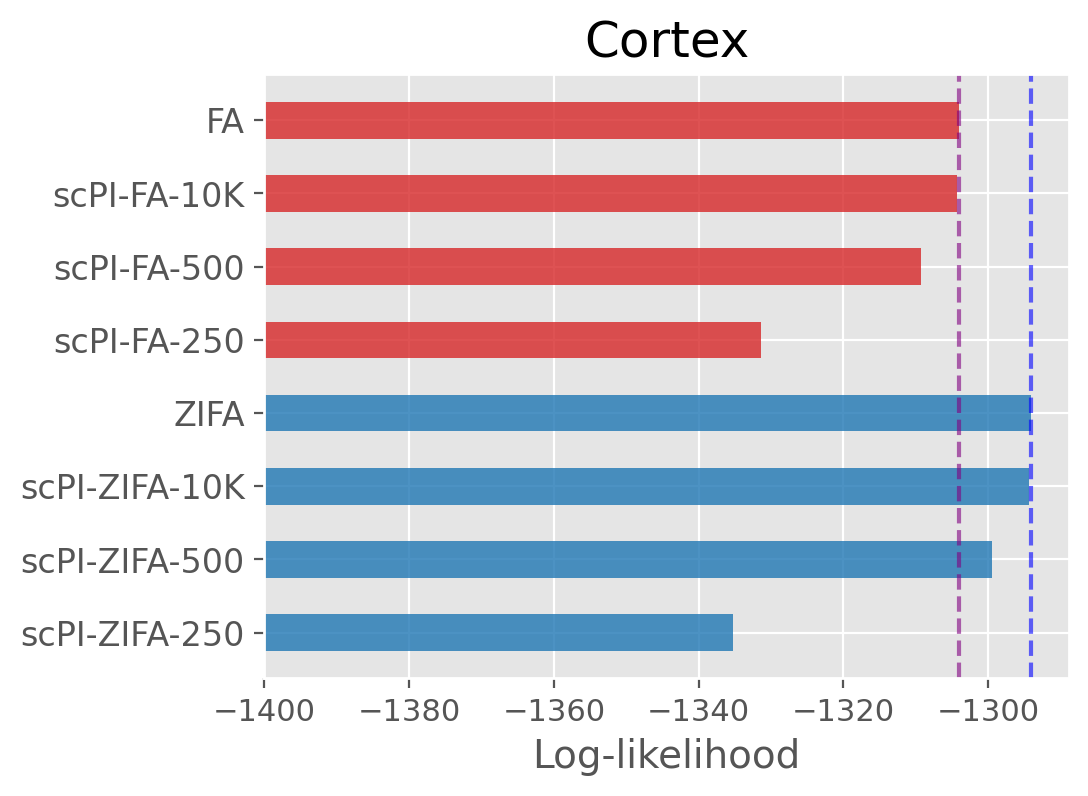

In [3]:
mean_logllh = np.array([-1335.2028+1400, -1299.5148+1400, -1294.3138+1400, -1294.1537+1400, \
                        -1331.38286+1400, -1309.2498+1400, -1304.2534+1400, -1304.097+1400])
barplot(mean_logllh, ["scPI-ZIFA-250", "scPI-ZIFA-500", "scPI-ZIFA-10K", "ZIFA", \
                       "scPI-FA-250", "scPI-FA-500", "scPI-FA-10K", "FA"], "Log-likelihood",
       minv=-1400, maxv=-1000)
plt.axvline(x=mean_logllh[3]-1400, linestyle="--", c='blue', alpha=0.6)
plt.axvline(x=mean_logllh[7]-1400, linestyle="--", c='purple', alpha=0.6)
plt.title("Cortex", fontsize=18)
plt.xticks(fontsize=11)
plt.yticks(fontsize=12)
# plt.savefig(data_path_save + "cortex-logllh-test.pdf", dpi=100)

In [4]:
def barplot(mean, alg, title, minv=1000, maxv=1350, save=None):
    ind = np.arange(len(mean))/2  # the x locations for the groups
    width = 0.25       # the width of the bars
    fig = plt.figure(dpi=200)
    grid = plt.GridSpec(1, 15, wspace=0.2, hspace=0.2)
    ax = plt.subplot(grid[:, 2:])
    rects1 = ax.barh(ind[:3], mean[:3], width, color='tab:blue', alpha = 0.8, left=-1400)
    rects1 = ax.barh(ind[3:], mean[3:], width, color='tab:red', alpha = 0.8, left=-1400)
    #ax.axvline(x=np.min(np.array(mean)[np.array(mean) > 0]), ymin=0, ymax = 5, linewidth=1, color='b')
    #plt.xlim(minv, maxv)
    
    # add some text for labels, title and axes ticks
    ax.set_xlabel(title, fontsize=14)
    ax.set_yticks(ind)
    ax.set_yticklabels(alg)

(array([0. , 0.5, 1. , 1.5, 2. , 2.5]),
 <a list of 6 Text major ticklabel objects>)

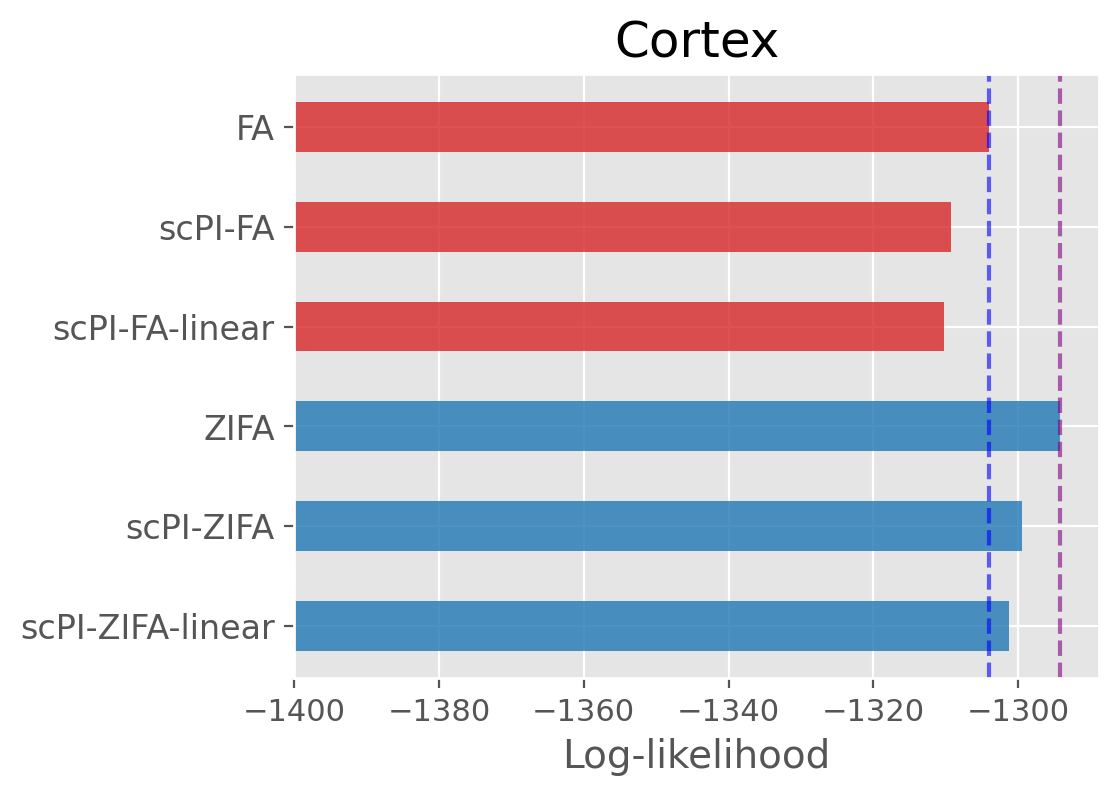

In [5]:
data_path_save = "/Users/jiazhao/Documents/HKUST/Projects/scPI/scPI_v2/Plots/v9/cortex-logllhtest/"
mean_logllh = np.array([-1301.2523+1400, -1299.5148+1400, -1294.1537+1400, \
                        -1310.3089+1400, -1309.2498+1400, -1304.097+1400])
barplot(mean_logllh, ["scPI-ZIFA-linear", "scPI-ZIFA", "ZIFA", "scPI-FA-linear", "scPI-FA", "FA"], "Log-likelihood",
       minv=-1340, maxv=-1120)
plt.axvline(x=mean_logllh[2]-1400, linestyle="--", c='purple', alpha=0.6)
plt.axvline(x=mean_logllh[5]-1400, linestyle="--", c='blue', alpha=0.6)
plt.title("Cortex", fontsize=18)
plt.xticks(fontsize=11)
plt.yticks(fontsize=12)
# plt.savefig(data_path_save + "cortex-logllh-test-linearity.pdf", dpi=100)